## Урок 7, задача № 1

### ДЗ к уроку Многомерный статистический анализ. Линейная регрессия

##### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [203]:
import numpy as np

In [204]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [205]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [206]:
# 1-й вариант расчета (углового) коэффициента парной линейной регрессии

In [207]:
b = (np.mean(ks*zp)-np.mean(ks)*np.mean(zp))/(np.mean(zp**2)-np.mean(zp)**2) 
b

2.620538882402765

In [208]:
# 2-й вариант расчета (углового) коэффициента парной линейной регрессии

In [209]:
b = (len(ks)*(np.sum(ks*zp)) - (np.sum(ks)*np.sum(zp)))/(len(ks)*(np.sum(zp**2))-((np.sum(zp)**2))) 
b

2.6205388824027653

In [210]:
a = np.mean(ks) - b*np.mean(zp)  # расчет интерсепта (свободного члена) парной линейной регрессии
a

444.17735732435955

In [211]:
ks_hat = 444.17736 + 2.62054*zp  # уравнение линейной регрессии
ks_hat

array([535.89626, 562.10166, 942.07996, 968.28536, 548.99896, 627.61516,
       585.68652, 837.25836, 758.64216, 732.43676])

In [212]:
np.corrcoef(zp,ks)  # коэффициент линейной корреляции Пирсона (по функции Numpy)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [213]:
r = b * np.std(zp) / np.std(ks)     # коэффициент линейной корреляции Пирсона (по мат.формулам) 
r

0.8874900920739164

In [214]:
r2 = r**2                # коэффициент детерминации (r2)
r2

0.7876386635293686

In [215]:
A_mean = 100 * np.mean(np.abs((ks - ks_hat) / ks))    # средняя ошибка аппроксимации Ā (почти хорошо описывает эмпирические данные)
A_mean

11.469254292355306

In [216]:
F_fact = (r**2 * (len(zp) - 2)) / (1 - r**2)   # фактическое значение F-критерия Фишера
F_fact

29.67164085966451

При 5 % уровне значимости и степенях свободы  k1=1  и  k2=10−2=8  табличное значение критерия:  Fкр=5.32

Так как  F_fact=29.67 > Fкр=5.32 , уравнение регрессии статистически значимо.

In [217]:
mse = ((ks-ks_hat)**2).sum()/len(zp)  # среднее квадратичное отклонение (по материалам урока)
mse

6470.414201194479

In [218]:
ax=None

In [219]:
mse = (np.square(ks-ks_hat)).mean(axis=ax) # среднее квадратичное отклонение (по материалам Stackoverflow)
mse

6470.414201194479

In [220]:
from sklearn.metrics import mean_squared_error # среднее квадратичное отклонение (с использованием функции mean_square_error)
mse = mean_squared_error(ks, ks_hat)
mse

6470.414201194479

In [221]:
from sklearn.linear_model import LinearRegression

In [222]:
zp = zp.reshape(-1,1)

In [223]:
w = np.dot(zp.T, zp)

In [224]:
w1 = np.dot(np.linalg.pinv(w), np.dot(zp.T, ks))
w1

array([5.88982042])

In [225]:
clf = LinearRegression(fit_intercept=False)

In [226]:
print(clf.fit(zp, ks).coef_) # значение β без интерсепта (intercept) 

[5.88982042]


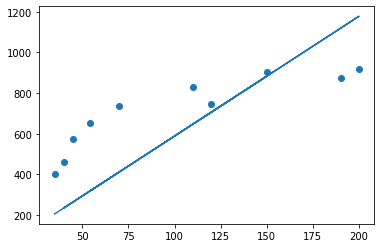

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zp,ks)
plt.plot(zp,5.88982042*zp)
plt.show()

In [228]:
clf = LinearRegression(fit_intercept=True)

In [229]:
print(clf.fit(zp, ks).coef_)  # значение β c интерсептом

[2.62053888]


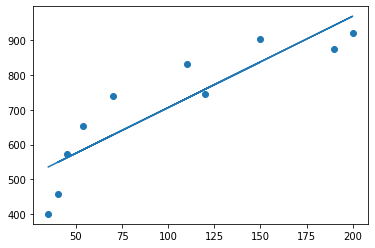

In [230]:
plt.scatter(zp,ks)
plt.plot(zp, 444.17736 + 2.62054*zp)
plt.show()

In [231]:
# Расчет коэффциентов линейной регрессии матричным методом, как показано на уроке

In [232]:
zp_c = zp.reshape((10,1))

In [233]:
ks_c = ks.reshape((10,1))

In [234]:
zp_c = np.hstack([np.ones((10,1)), zp_c])
zp_c

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [235]:
B = np.dot(np.linalg.inv(np.dot(zp_c.T, zp_c)), zp_c.T@ks_c)
B

array([[444.17735732],
       [  2.62053888]])